In [1]:
from SimpleBandits import Simulator, RandomPolicy
import matplotlib.pyplot as plt
import numpy as np

In [30]:
n_drugs = 8
n_experiments = 100
horizon = 1000


In [33]:
# By initialising the experiment outside the outer loop,
# we always run the experiment in the same environment.
# Hence, the randomness is only due to the policy and
# the inherent stochasticity of the environment.
R = np.zeros([horizon, n_experiments])
environment = Simulator(n_drugs)
for exp in range(n_experiments):
    policy = RandomPolicy(n_drugs)
    environment.reset()
    policy.reset()
    for t in range(horizon):
        a_t = policy.act()
        r_t = environment.step(a_t)
        policy.update(a_t, r_t)
        R[t, exp] = r_t


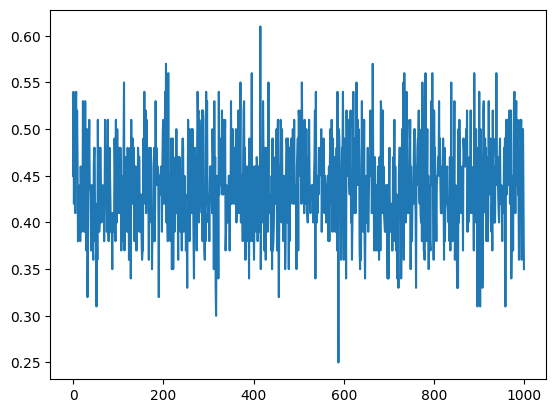

In [34]:
plt.plot(np.mean(R, axis=1))

In [37]:
# By initialising the experiment inside the outer loop,
# we always run the experiment in a different environment.
# Hence, the randomness is due to the variability in the
# environments, as well as the policy and
# the inherent stochasticity of the environment.
R = np.zeros([horizon, n_experiments])
for exp in range(n_experiments):
    environment = Simulator(n_drugs)
    policy = RandomPolicy(n_drugs)
    environment.reset()
    policy.reset()
    for t in range(horizon):
        a_t = policy.act()
        r_t = environment.step(a_t)
        policy.update(a_t, r_t)
        R[t, exp] = r_t


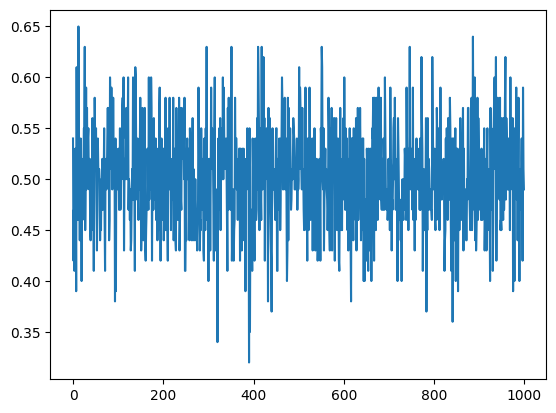

In [38]:
plt.plot(np.mean(R, axis=1))